# Evaluation

In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from utils import plot_overlay

In [2]:
TRAIN_PATH = '../data/Munich/2023/raw'
PREDICTED_PATH = '../data/Munich/2023/prediction/samgeo_batches_v3'

train_files = os.listdir(TRAIN_PATH)
train_files = list(filter(lambda x: x.endswith(".tif"), train_files))

### Compare images

../data/Munich/2023/raw/32690_5335.tif ../data/Munich/2023/raw/32690_5335_label.png ../data/Munich/2023/prediction/samgeo_batches_v3/32690_5335_predicted.tif


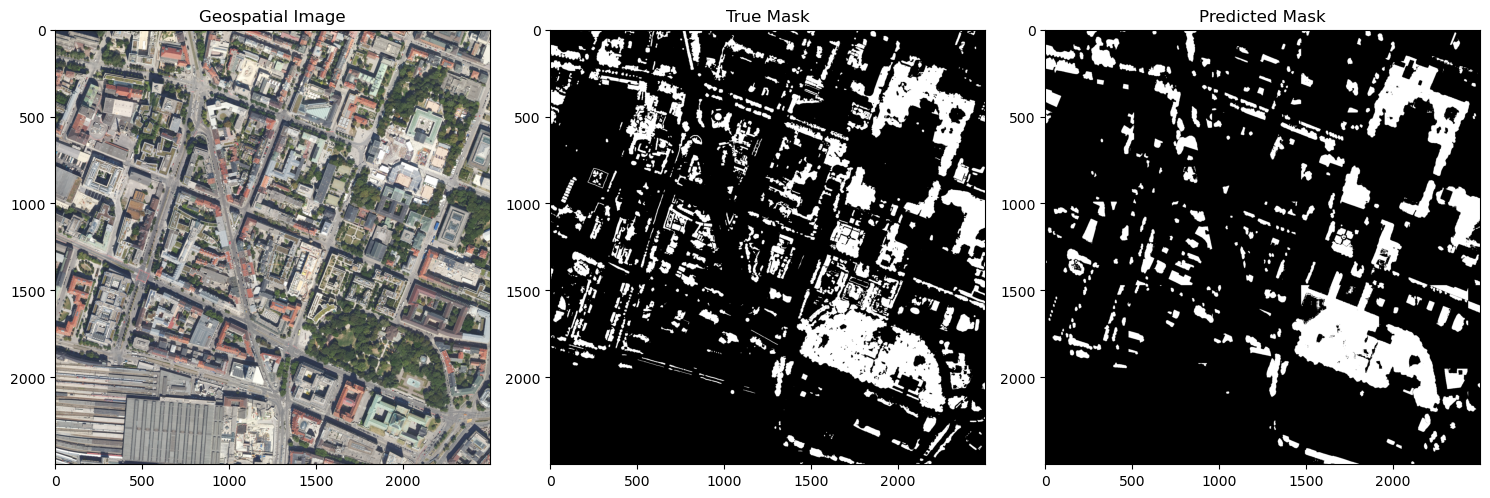

In [13]:
# show one image
file_name = train_files[1]

img_name = file_name.rstrip('.tif')
img_path = os.path.join(TRAIN_PATH, file_name)
mask_path = os.path.join(TRAIN_PATH, img_name + '_label.png')
predicted_path = os.path.join(PREDICTED_PATH, img_name + '_predicted.tif')
print(img_path, mask_path, predicted_path)

# plot 3 images first actual then label and predicted
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mask = cv2.imread(mask_path)
predicted = cv2.imread(predicted_path)

plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Geospatial Image')
plt.subplot(1, 3, 2)
plt.imshow(mask)
plt.title('True Mask')
plt.subplot(1, 3, 3)
plt.imshow(predicted)
plt.title('Predicted Mask')

plt.tight_layout()
plt.show()

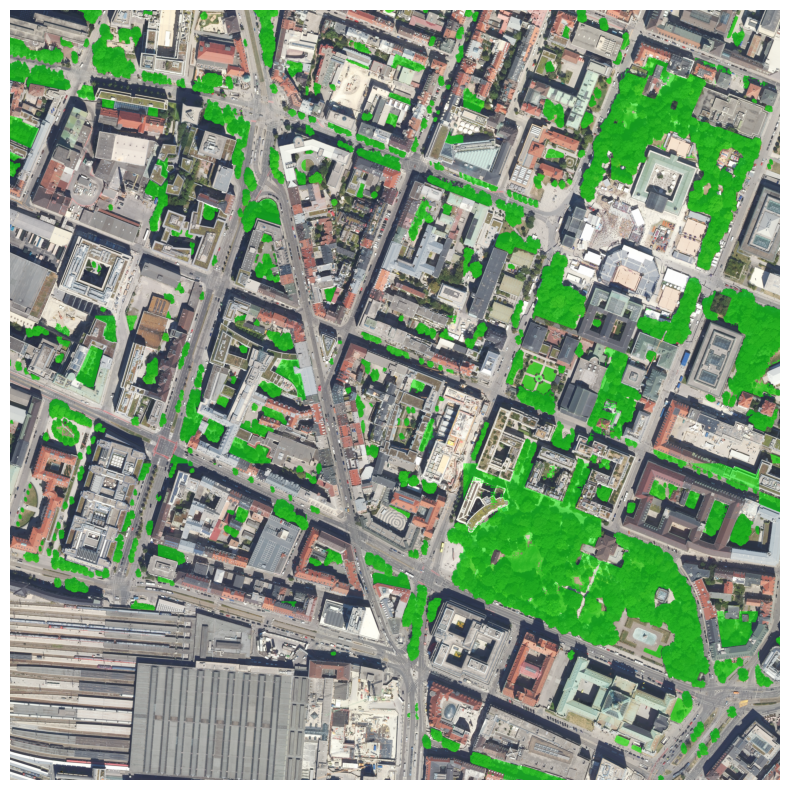

In [14]:
plot_overlay(img_path, predicted_path)

In [7]:
import sys
sys.path.append('../mask_evaluation')
from main import print_metrics, evaluate_files

In [8]:

masks = []

# create list of masks (base_mask, predicted_mask)
for file_name in train_files:
    img_name = file_name.rstrip('.tif')
    img_path = os.path.join(TRAIN_PATH, file_name)
    mask_path = os.path.join(TRAIN_PATH, img_name + '_label.png')
    predicted_path = os.path.join(PREDICTED_PATH, img_name + '_predicted.tif')
    masks.append((predicted_path, mask_path))

evaluation = evaluate_files(masks)

print_metrics(evaluation)

Results: 
   accuracy: 86.682 %
         f1:  0.842
     recall:  0.878 (or sensitivity)
  precision:  0.810
specificity:  0.859

TPR: 0.878 | FNR: 0.122
TNR: 0.859 | FPR: 0.141
PPV: 0.810 | FDR: 0.190
NPV: 0.912 | FOR: 0.088
